# Cepstrum smoothing

Inspired by: [ESTIMATING TRANSFER FUNCTION FROM AIR TO BONE CONDUCTION USING SINGING VOICE](https://ccrma.stanford.edu/~sywon/research/OnesOwnHearing/SingingTF/ICMC2005.pdf) by Won and Berger.

In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

fft = np.fft.fft
ifft = np.fft.ifft

In [2]:
INPUT_FILE = "data/martin_dcx1re_c414_left_pickup_right.wav"

In [3]:
data, sample_rate_Hz = sf.read(INPUT_FILE)
ydata, xdata = data.T

## Naive deconvolution

In [4]:
w = np.blackman(len(xdata))
X = fft(w * xdata, 2048)
Y = fft(w * ydata, 2048)
H = Y/X

In [5]:
def freqresp(H, fig=None, ax=None):
    f = np.linspace(0, sample_rate_Hz, len(H))
    end = len(f)//2
    f_ = f[0:end]
    H_ = 20*np.log10(np.abs(H[0:end]))
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        
    ax.plot(f_, H_)
    ax.grid()
    fig.tight_layout()
    return fig, ax

pass

## CEPSTRUM smoothing individual parts

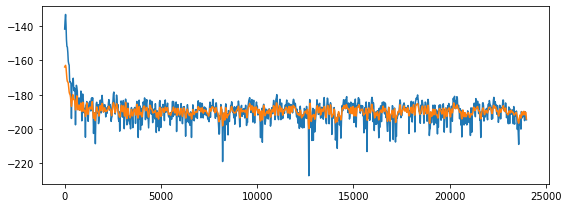

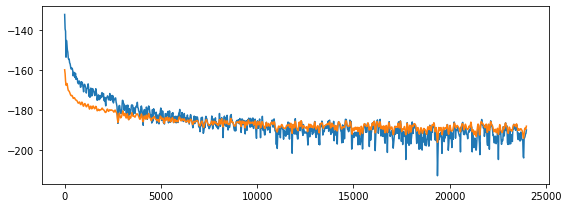

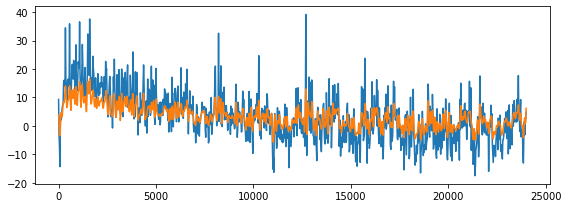

In [6]:
n = np.arange(2048)
w = np.ones(len(n)) * (n < 500)

Xc = np.exp(fft(w * ifft(np.log(np.abs(X)))))
Yc = np.exp(fft(w * ifft(np.log(np.abs(Y)))))
Hc = Yc/Xc

fig, ax = freqresp(X)
freqresp(Xc, fig, ax)

fig, ax = freqresp(Y)
freqresp(Yc, fig, ax)

fig, ax = freqresp(H)
freqresp(Hc, fig, ax)

pass

## Impulse response

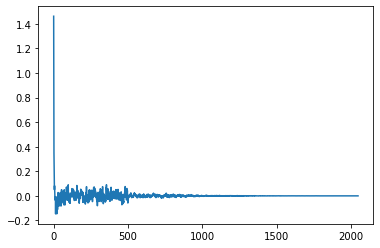

In [7]:
h = np.real(ifft(Hc))
plt.plot(h)
# sf.write(f"ir_{int(time.time())}.wav", h, samplerate=sample_rate_Hz)